In [75]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import glob

In [76]:
# Specify the path to your main folder containing subfolders with CSV files
main_path = r"C:\Users\vaugh\Desktop\basketball-pf-research"

# Recursively search for all CSV files in the subfolders
all_files = glob.glob(os.path.join(main_path, "*.csv"))

seasons = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

separated_dfs_by_season = {}

for season in seasons:
    separated_dfs_by_season[season] = {}
    for filename in all_files:
        if season in filename:
            print(filename)
            filename = filename.split('\\')[-1]
            df = pd.read_csv(filename)
            separated_dfs_by_season[season][filename[:-4]] = pd.read_csv(filename)

C:\Users\vaugh\Desktop\basketball-pf-research\2001advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2001per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2001play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2001shooting.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002shooting.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003shooting.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2004advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2004per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2004play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-re

In [77]:
# Remove 'Unnamed: 0' columns from each dataframe in the dictionary
for season in separated_dfs_by_season:
    for df in separated_dfs_by_season[season]:
        separated_dfs_by_season[season][df].drop(columns=[col for col in separated_dfs_by_season[season][df].columns if 'Unnamed' in col], inplace=True)

# Create a new dictionary to hold the merged dataframes by season
dfs_by_season = {}

for season in separated_dfs_by_season:
    merged_df = pd.merge(separated_dfs_by_season[season][season + 'advanced'], separated_dfs_by_season[season][season + 'shooting'], on='Player', how='inner')
    merged_df = pd.merge(merged_df, separated_dfs_by_season[season][season + 'per_game'], on='Player', how='inner')
    merged_df = pd.merge(merged_df, separated_dfs_by_season[season][season + 'play-by-play'], on='Player', how='inner')
    dfs_by_season[season] = merged_df

In [78]:
dfs_by_season['2019']

,Player,G,MP,FTr,USG%,% of FGA by Distance - 2P,% of FGA by Distance - 0-3,% of FGA by Distance - 3-10,% of FGA by Distance - 10-16,% of FGA by Distance - 16-3P,...,FG,FGA,ORB,DRB,AST,STL,BLK,TOV,PF,Fouls Drawn - Shoot
0,Aaron Gordon,78,2633,.242,21.8,.668,.328,.129,.116,.096,...,6.0,13.4,1.7,5.7,3.7,0.7,0.7,2.1,2.2,129
1,Aaron Holiday,50,646,.191,21.9,.515,.183,.111,.076,.145,...,2.1,5.2,0.1,1.2,1.7,0.4,0.3,0.8,1.4,17
2,Abdel Nader,61,694,.167,15.1,.535,.353,.149,.014,.019,...,1.5,3.5,0.2,1.7,0.3,0.3,0.2,0.4,1.1,22
3,Al Horford,68,1973,.131,19.0,.719,.242,.207,.119,.151,...,5.7,10.6,1.8,5.0,4.2,0.9,1.3,1.5,1.9,46
4,Al-Farouq Aminu,81,2292,.292,13.7,.528,.351,.105,.029,.044,...,3.2,7.3,1.4,6.1,1.3,0.8,0.4,0.9,1.8,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Zaza Pachulia,68,878,.642,15.0,.979,.523,.212,.098,.145,...,1.3,2.8,1.5,2.4,1.3,0.5,0.3,0.8,2.2,48
527,Zhaire Smith,6,111,.235,16.4,.529,.324,.059,.059,.088,...,2.3,5.7,0.5,1.7,1.7,0.3,0.3,1.0,1.3,2
528,Zhou Qi,1,1,.000,43.4,1.000,1.000,.000,.000,.000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
529,Álex Abrines,31,588,.083,12.2,.191,.102,.025,.019,.045,...,1.8,5.1,0.2,1.4,0.6,0.5,0.2,0.5,1.7,4


In [79]:
# Create an empty list to store each season's dataframe with the season column added
df_list = []

# Loop over each season and its corresponding dataframe in dfs_by_season
for season, df in dfs_by_season.items():
    # Create a copy of the dataframe and add a 'Season' column with the current season
    df_copy = df.copy()
    df_copy['Season'] = season
    # Append the modified dataframe to the list
    df_list.append(df_copy)

# Concatenate all dataframes in the list into a single dataframe and set the index appropriately
combined_df = pd.concat(df_list, ignore_index=True)
combined_df.set_index(['Season', 'Player'], inplace=True)

In [80]:
combined_df = combined_df.apply(pd.to_numeric, errors='coerce')

# Changing all the values in the df to be floats so that I can apply PCA
combined_df.fillna(0, inplace=True)  # Filling NaNs with 0
combined_df = combined_df.astype(float)

# Replacing any infinite values with 0
combined_df.replace([np.inf, -np.inf], 0, inplace=True)

per_48_stats = ['FGA', 'PF', 'BLK', 'STL', 'DRB', 'ORB', 'TOV', 'AST', 'Fouls Drawn - Shoot']

for stat in per_48_stats:
    combined_df[stat] = combined_df[stat] / (combined_df['MP'] / combined_df['G']) * 48

In [81]:
combined_df.columns

Index(['G', 'MP', 'FTr', 'USG%', '% of FGA by Distance - 2P',
       '% of FGA by Distance - 0-3', '% of FGA by Distance - 3-10',
       '% of FGA by Distance - 10-16', '% of FGA by Distance - 16-3P',
       '% of FGA by Distance - 3P', '% of FG Ast'd - 2P', '% of FG Ast'd - 3P',
       'Dunks - %FGA', 'Corner 3s - %3PA', 'GS', 'FG', 'FGA', 'ORB', 'DRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'Fouls Drawn - Shoot'],
      dtype='object')

In [82]:
combined_df

G      MP    FTr  USG%  % of FGA by Distance - 2P  \
Season Player                                                                 
2001   A.C. Green      82.0  1411.0  0.343  14.4                      0.981   
       A.J. Guyton     33.0   630.0  0.094  16.5                      0.641   
       Aaron McKie     76.0  2394.0  0.272  18.9                      0.762   
       Aaron Williams  82.0  2336.0  0.477  17.8                      0.997   
       Adam Keefe      67.0   836.0  0.396  11.5                      0.981   
...                     ...     ...    ...   ...                        ...   
2019   Zaza Pachulia   68.0   878.0  0.642  15.0                      0.979   
       Zhaire Smith     6.0   111.0  0.235  16.4                      0.529   
       Zhou Qi          1.0     1.0  0.000  43.4                      1.000   
       Álex Abrines    31.0   588.0  0.083  12.2                      0.191   
       Ángel Delgado    2.0    15.0  0.400  16.5                      1.000   

                       % of FGA by Distance - 0-3  \
Season Player                                       
2001   A.C. Green                           0.278   
       A.J. Guyton                          0.078   
       Aaron McKie                          0.232   
       Aaron Williams                       0.502   
       Adam Keefe                           0.377   
...                                           ...   
2019   Zaza Pachulia                        0.523   
       Zhaire Smith                         0.324   
       Zhou Qi                              1.000   
       Álex Abrines                         0.102   
       Ángel Delgado                        0.800   

                       % of FGA by Distance - 3-10  \
Season Player                                        
2001   A.C. Green                            0.102   
       A.J. Guyton                           0.042   
       Aaron McKie                           0.137   
       Aaron Williams                        0.262   
       Adam Keefe                            0.176   
...                                            ...   
2019   Zaza Pachulia                         0.212   
       Zhaire Smith                          0.059   
       Zhou Qi                               0.000   
       Álex Abrines                          0.025   
       Ángel Delgado                         0.200   

                       % of FGA by Distance - 10-16  \
Season Player                                         
2001   A.C. Green                             0.164   
       A.J. Guyton                            0.094   
       Aaron McKie                            0.183   
       Aaron Williams                         0.131   
       Adam Keefe                             0.170   
...                                             ...   
2019   Zaza Pachulia                          0.098   
       Zhaire Smith                           0.059   
       Zhou Qi                                0.000   
       Álex Abrines                           0.019   
       Ángel Delgado                          0.000   

                       % of FGA by Distance - 16-3P  \
Season Player                                         
2001   A.C. Green                             0.438   
       A.J. Guyton                            0.427   
       Aaron McKie                            0.209   
       Aaron Williams                         0.103   
       Adam Keefe                             0.258   
...                                             ...   
2019   Zaza Pachulia                          0.145   
       Zhaire Smith                           0.088   
       Zhou Qi                                0.000   
       Álex Abrines                           0.045   
       Ángel Delgado                          0.000   

                       % of FGA by Distance - 3P  ...   FG        FGA  \
Season Player                                     ...                   
2001   A.C. Green          

In [83]:
# Cleaning up the dataframe
combined_df['Fouls Drawn - Shoot'] = combined_df['Fouls Drawn - Shoot'] / combined_df['G']
combined_df.rename(columns = {'PF': 'Personal Fouls Committed'}, inplace=True)
combined_df.rename(columns = {'Fouls Drawn - Shoot': 'Shooting Fouls Drawn'}, inplace=True)
combined_df.drop(columns = ['G', 'MP', '% of FGA by Distance - 2P', 'GS', 'FG'], inplace=True)

In [84]:
combined_df

FTr  USG%  % of FGA by Distance - 0-3  \
Season Player                                                    
2001   A.C. Green      0.343  14.4                       0.278   
       A.J. Guyton     0.094  16.5                       0.078   
       Aaron McKie     0.272  18.9                       0.232   
       Aaron Williams  0.477  17.8                       0.502   
       Adam Keefe      0.396  11.5                       0.377   
...                      ...   ...                         ...   
2019   Zaza Pachulia   0.642  15.0                       0.523   
       Zhaire Smith    0.235  16.4                       0.324   
       Zhou Qi         0.000  43.4                       1.000   
       Álex Abrines    0.083  12.2                       0.102   
       Ángel Delgado   0.400  16.5                       0.800   

                       % of FGA by Distance - 3-10  \
Season Player                                        
2001   A.C. Green                            0.102   
       A.J. Guyton                           0.042   
       Aaron McKie                           0.137   
       Aaron Williams                        0.262   
       Adam Keefe                            0.176   
...                                            ...   
2019   Zaza Pachulia                         0.212   
       Zhaire Smith                          0.059   
       Zhou Qi                               0.000   
       Álex Abrines                          0.025   
       Ángel Delgado                         0.200   

                       % of FGA by Distance - 10-16  \
Season Player                                         
2001   A.C. Green                             0.164   
       A.J. Guyton                            0.094   
       Aaron McKie                            0.183   
       Aaron Williams                         0.131   
       Adam Keefe                             0.170   
...                                             ...   
2019   Zaza Pachulia                          0.098   
       Zhaire Smith                           0.059   
       Zhou Qi                                0.000   
       Álex Abrines                           0.019   
       Ángel Delgado                          0.000   

                       % of FGA by Distance - 16-3P  \
Season Player                                         
2001   A.C. Green                             0.438   
       A.J. Guyton                            0.427   
       Aaron McKie                            0.209   
       Aaron Williams                         0.103   
       Adam Keefe                             0.258   
...                                             ...   
2019   Zaza Pachulia                          0.145   
       Zhaire Smith                           0.088   
       Zhou Qi                                0.000   
       Álex Abrines                           0.045   
       Ángel Delgado                          0.000   

                       % of FGA by Distance - 3P  % of FG Ast'd - 2P  \
Season Player                                                          
2001   A.C. Green                          0.019               0.764   
       A.J. Guyton                         0.359               0.608   
       Aaron McKie                         0.238               0.481   
       Aaron Williams                      0.003               0.623   
       Adam Keefe                          0.019               0.683   
...                                          ...                 ...   
2019   Zaza Pachulia                       0.021               0.624   
       Zhaire Smith                        0.471               0.500   
       Zhou Qi                             0.000               1.000   
       Álex Abrines                        0.809               0.800   
       Ángel Delgado                       0.000               1.000   

                       % of FG Ast'd - 3P  Dunks - %FGA  Corner 3s - %3PA  \
Season Player    

In [85]:
# Create a copy of the dataframe to apply PCA on
final_df = combined_df

# Changing all the values in the df to be floats so that I can apply PCA
final_df.fillna(0, inplace=True)  # Filling NaNs with 0
final_df = final_df.astype(float)

# Replacing any infinite values with 0
final_df.replace([np.inf, -np.inf], 0, inplace=True)

ordered_cols = ['USG%', 'FGA', 'Personal Fouls Committed', 'BLK', 'STL', 'DRB', 'ORB', 'TOV', 'AST', "% of FG Ast'd - 3P", "% of FG Ast'd - 2P", 'FTr', 'Shooting Fouls Drawn', 'Corner 3s - %3PA', '% of FGA by Distance - 3P', '% of FGA by Distance - 16-3P', '% of FGA by Distance - 10-16', '% of FGA by Distance - 3-10', '% of FGA by Distance - 0-3', 'Dunks - %FGA']
final_df = final_df.reindex(columns = ordered_cols)

# Removing any players named "Player"
final_df.reset_index(inplace=True)
final_df = final_df[final_df['Player'] != 'Player']
final_df.set_index(['Season', 'Player'], inplace=True)

In [86]:
final_df

USG%        FGA  Personal Fouls Committed       BLK  \
Season Player                                                                
2001   A.C. Green      14.4  11.158044                  4.184266  0.278951   
       A.J. Guyton     16.5  14.582857                  2.765714  0.502857   
       Aaron McKie     18.9  14.323810                  3.504762  0.152381   
       Aaron Williams  17.8  13.310959                  6.571233  2.358904   
       Adam Keefe      11.5   9.232536                  5.770335  1.154067   
...                     ...        ...                       ...       ...   
2019   Zaza Pachulia   15.0  10.409112                  8.178588  1.115262   
       Zhaire Smith    16.4  14.789189                  3.372973  0.778378   
       Zhou Qi         43.4  48.000000                  0.000000  0.000000   
       Álex Abrines    12.2  12.906122                  4.302041  0.506122   
       Ángel Delgado   16.5  16.000000                  6.400000  0.000000   

                            STL       DRB       ORB       TOV       AST  \
Season Player                                                             
2001   A.C. Green      1.115804  6.973777  3.626364  1.394755  1.394755   
       A.J. Guyton     0.754286  2.011429  0.754286  1.760000  4.777143   
       Aaron McKie     2.133333  5.638095  0.609524  4.114286  7.619048   
       Aaron Williams  1.179452  7.750685  4.380822  2.695890  1.853425   
       Adam Keefe      1.538756  6.924402  5.000957  2.308134  1.923445   
...                         ...       ...       ...       ...       ...   
2019   Zaza Pachulia   1.858770  8.922096  5.576310  2.974032  4.832802   
       Zhaire Smith    0.778378  4.410811  1.297297  2.594595  4.410811   
       Zhou Qi         0.000000  0.000000  0.000000  0.000000  0.000000   
       Álex Abrines    1.265306  3.542857  0.506122  1.265306  1.518367   
       Ángel Delgado   3.200000  6.400000  6.400000  0.000000  0.000000   

                       % of FG Ast'd - 3P  % of FG Ast'd - 2P    FTr  \
Season Player                                                          
2001   A.C. Green                   0.000               0.764  0.343   
       A.J. Guyton                  0.852               0.608  0.094   
       Aaron McKie                  0.943               0.481  0.272   
       Aaron Williams               0.000               0.623  0.477   
       Adam Keefe                   1.000               0.683  0.396   
...                                   ...                 ...    ...   
2019   Zaza Pachulia                0.000               0.624  0.642   
       Zhaire Smith                 0.667               0.500  0.235   
       Zhou Qi                      0.000               1.000  0.000   
       Álex Abrines                 0.951               0.800  0.083   
       Ángel Delgado                0.000               1.000  0.400   

                       Shooting Fouls Drawn  Corner 3s - %3PA  \
Season Player                                                   
2001   A.C. Green                  1.496811             0.167   
       A.J. Guyton                 0.380952             0.275   
       Aaron McKie                 1.463659             0.359   
       Aaron Williams              2.691781             0.000   
       Adam Keefe                  1.435407             0.333   
...                                     ...               ...   
2019   Zaza Pachulia               2.624146             0.000   
       Zhaire Smith                0.864865             0.250   
       Zhou Qi                     0.000000             0.000   
       Álex Abrines                0.326531             0.205   
       Ángel Delgado               3.200000             0.000   

                       % of FGA by Distance - 3P  \
Season Player                                      
2001   A.C. Green                          0.019   
       A.J. Guyton                         0.359   
       Aaron McKie                       

In [87]:
final_df.to_csv('full_dataset_before_PCA.csv')

In [88]:
for column in final_df.columns:
    print(f'{column}: {final_df[column].median():.2f}')

USG%: 18.30
FGA: 15.01
Personal Fouls Committed: 4.38
BLK: 0.64
STL: 1.39
DRB: 5.69
ORB: 1.80
TOV: 2.59
AST: 3.00
% of FG Ast'd - 3P: 0.83
% of FG Ast'd - 2P: 0.58
FTr: 0.26
Shooting Fouls Drawn: 1.61
Corner 3s - %3PA: 0.19
% of FGA by Distance - 3P: 0.21
% of FGA by Distance - 16-3P: 0.17
% of FGA by Distance - 10-16: 0.09
% of FGA by Distance - 3-10: 0.13
% of FGA by Distance - 0-3: 0.29
Dunks - %FGA: 0.03


In [89]:
# Creating an empty DataFrame to hold the standardized values
standardized_data = pd.DataFrame()

# Looping through each column to standardize
for column in final_df.columns:
    mean = final_df[column].mean()
    std = final_df[column].std()
    standardized_data[column] = (final_df[column] - mean) / std

# Setting up PCA to keep only the first 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(standardized_data)

In [90]:
# Summing the explained variances for each component to verify the results from the paper
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)

0.6281531902935072

In [91]:
explained_variance

array([0.26899485, 0.14202613, 0.08121441, 0.07675788, 0.05915991])

In [92]:
# Getting the statistics for each individual principal component
component_loadings = pca.components_
loadings_df = pd.DataFrame(component_loadings, columns=final_df.columns, index=[f'PC{i+1}' for i in range(5)])
loadings_df

,USG%,FGA,Personal Fouls Committed,BLK,STL,DRB,ORB,TOV,AST,% of FG Ast'd - 3P,% of FG Ast'd - 2P,FTr,Shooting Fouls Drawn,Corner 3s - %3PA,% of FGA by Distance - 3P,% of FGA by Distance - 16-3P,% of FGA by Distance - 10-16,% of FGA by Distance - 3-10,% of FGA by Distance - 0-3,Dunks - %FGA
PC1,-0.093050,-0.143414,0.222727,0.295682,-0.088330,0.266248,0.318890,-0.003130,-0.221571,-0.284471,0.167531,0.220865,0.169740,-0.157813,-0.313709,-0.170219,0.018178,0.231687,0.341888,0.307378
PC2,0.520206,0.429055,-0.088742,-0.006838,0.093526,0.052883,0.020187,0.375339,0.245301,-0.058690,-0.236322,0.150774,0.384836,-0.164544,-0.144420,0.022684,0.140168,0.154028,0.021313,-0.044455
PC3,-0.201789,-0.285336,0.021303,-0.126096,0.288059,-0.160533,-0.072248,0.187996,0.303863,-0.066170,-0.396921,0.210128,-0.007786,-0.127228,0.151426,-0.389041,-0.404462,0.024260,0.237106,0.053481
PC4,-0.194159,-0.228480,0.211705,-0.065278,0.050445,-0.161487,-0.054992,0.128931,0.205785,-0.383379,-0.150378,-0.100165,-0.266840,-0.337957,-0.293980,0.275243,0.411922,0.089855,-0.124029,-0.223689
PC5,-0.067842,-0.176629,-0.007736,-0.136498,0.282139,-0.170766,-0.058330,-0.014040,0.065014,0.057722,0.165798,0.437227,0.285856,0.271796,-0.239551,0.451488,0.057395,-0.382027,0.181604,0.088874


In [93]:
for i, row in loadings_df.iterrows():
    print(i)
    print(row)
    print()

PC1
USG%                           -0.093050
FGA                            -0.143414
Personal Fouls Committed        0.222727
BLK                             0.295682
STL                            -0.088330
DRB                             0.266248
ORB                             0.318890
TOV                            -0.003130
AST                            -0.221571
% of FG Ast'd - 3P             -0.284471
% of FG Ast'd - 2P              0.167531
FTr                             0.220865
Shooting Fouls Drawn            0.169740
Corner 3s - %3PA               -0.157813
% of FGA by Distance - 3P      -0.313709
% of FGA by Distance - 16-3P   -0.170219
% of FGA by Distance - 10-16    0.018178
% of FGA by Distance - 3-10     0.231687
% of FGA by Distance - 0-3      0.341888
Dunks - %FGA                    0.307378
Name: PC1, dtype: float64

PC2
USG%                            0.520206
FGA                             0.429055
Personal Fouls Committed       -0.088742
BLK                   

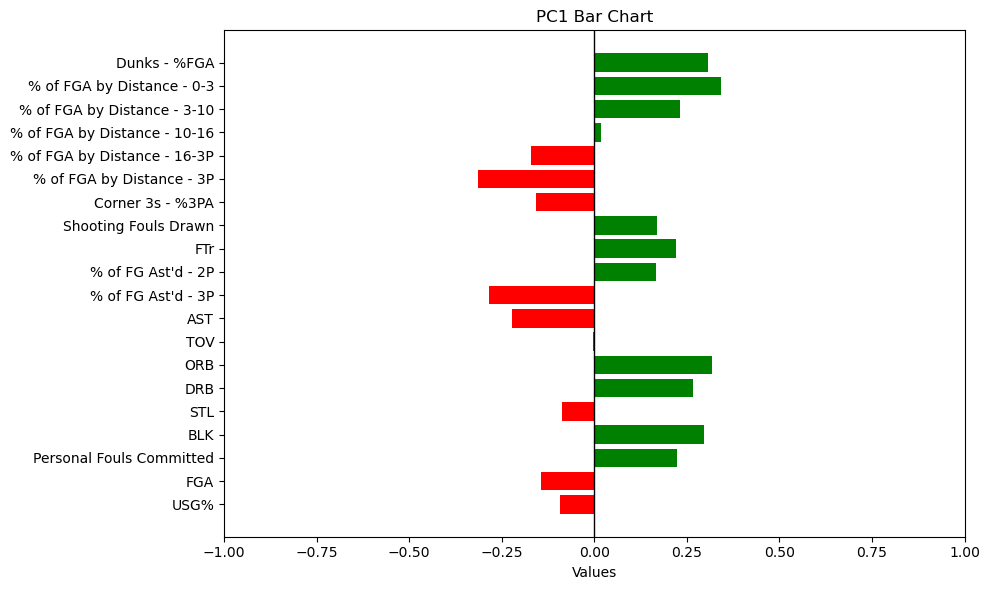

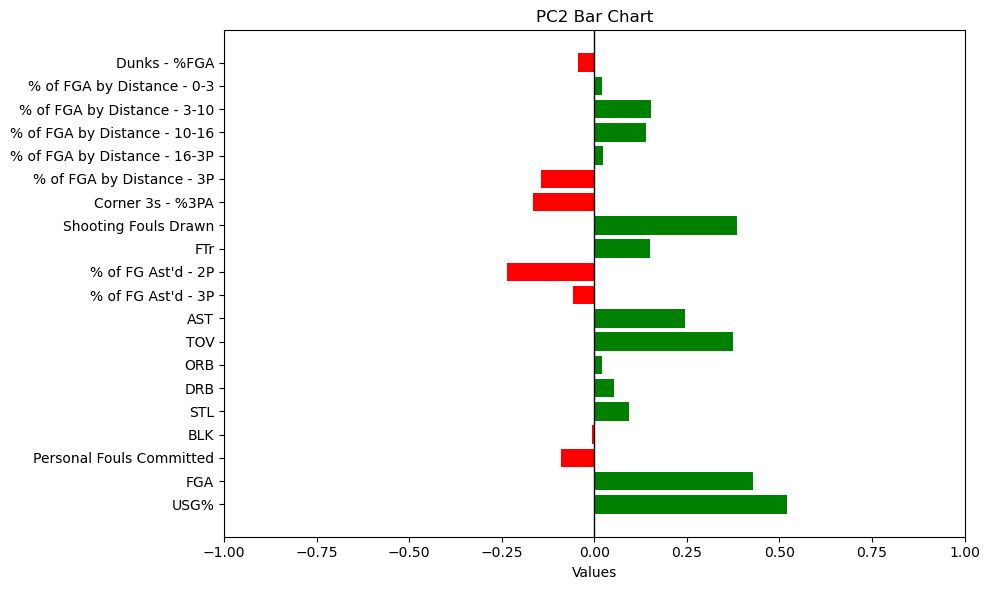

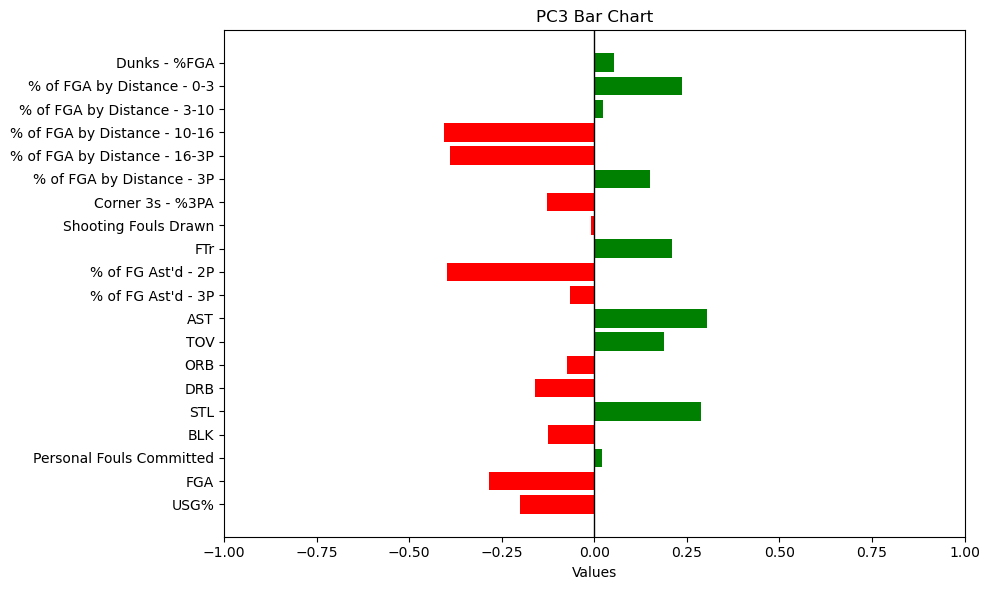

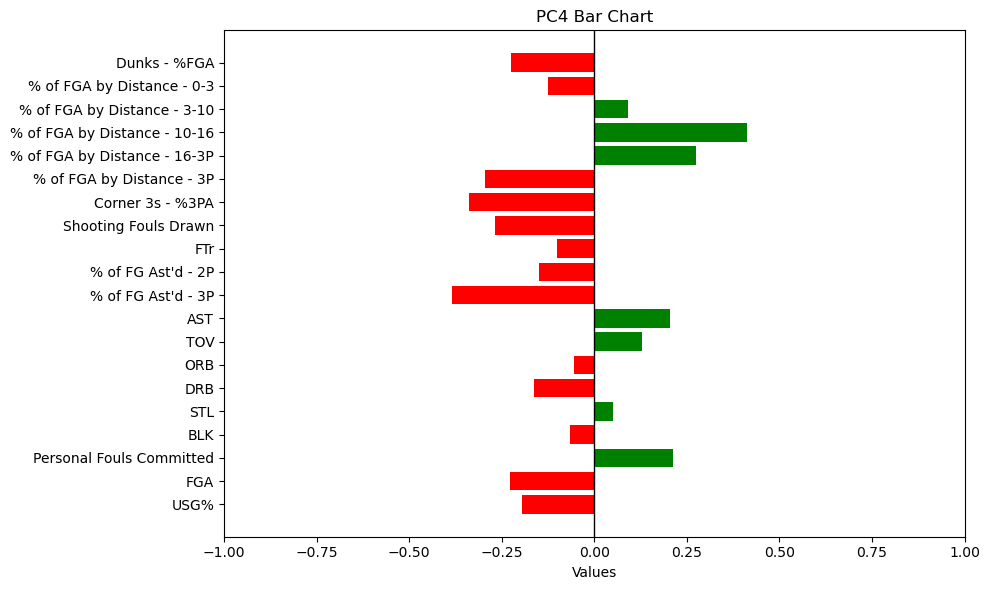

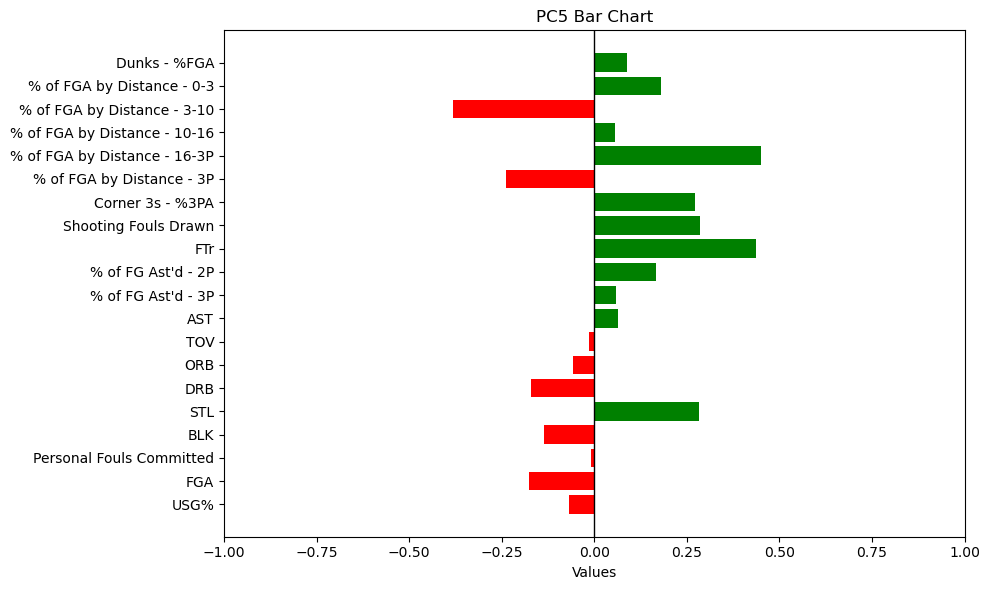

In [94]:
# Looping through each row to create individual plots
for i, row in loadings_df.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Make the bar green if the value is positive, red if it is negative
    colors = ['green' if val >= 0 else 'red' for val in row]
    
    ax.barh(loadings_df.columns, row, color=colors)
    
    # Add vertical line at x=0
    ax.axvline(0, color='black', linewidth=1)
    
    # Center each graph at 0 and range from -1 to 1 for consistency
    ax.set_xlim(-1, 1)
    
    # Set titles and labels
    ax.set_title(f'{i} Bar Chart')
    ax.set_xlabel('Values')
    
    plt.tight_layout()
    plt.show()

In [95]:
# Applying the PCA transformation to get the principal component scores for each player
pca_scores = pca.transform(final_df)

# Converting to DataFrame
pca_scores_df = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(5)], index=final_df.index)

In [96]:
pca_scores_df

PC1        PC2        PC3        PC4        PC5
Season Player                                                               
2001   A.C. Green       1.151785  13.788141  -6.838558  -5.730690  -3.069604
       A.J. Guyton     -3.462249  16.516936  -6.318832  -5.678356  -3.188951
       Aaron McKie     -3.112862  19.986989  -5.405636  -5.874836  -3.012271
       Aaron Williams   2.455642  17.472834  -7.826710  -6.810085  -3.958020
       Adam Keefe       2.344406  11.770478  -5.366970  -4.743499  -2.589224
...                          ...        ...        ...        ...        ...
2019   Zaza Pachulia    3.068854  15.611814  -5.331242  -4.742522  -2.907456
       Zhaire Smith    -2.079390  17.082990  -6.439016  -6.223070  -3.699687
       Zhou Qi        -10.105444  42.912116 -22.560075 -19.891632 -10.986258
       Álex Abrines    -1.539472  12.414182  -5.927378  -5.379327  -3.196213
       Ángel Delgado    2.176621  16.750576  -8.469802  -7.854020  -3.234028

[8870 rows x 5 columns]

In [97]:
pca_scores_df.to_csv('full_dataset_with_PCA.csv')